### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [6]:
# Asegurarse de que esté cargado el DataFrame con la columna 'nombre_tienda' y 'precio'
facturacion_por_tienda = tienda.groupby('Vendedor')['Precio'].sum().sort_values(ascending=False)

# Mostrar resultado
print(facturacion_por_tienda)


Vendedor
Maria Alfonso      101528700.0
Rafael Acosta       96271300.0
Izabela de León     93776500.0
Felipe Santos       90206900.0
Juliana Costa       85678500.0
Lucas Olivera       84882800.0
Pedro Gomez         82973900.0
Beatriz Morales     79347300.0
Juan Fernandez      78040000.0
Camila Rivera       75847900.0
Blanca Ramirez      74766300.0
Mariana Herrera     71352200.0
Santiago Silva      70093900.0
Ángel Rodriguez     66114200.0
Name: Precio, dtype: float64


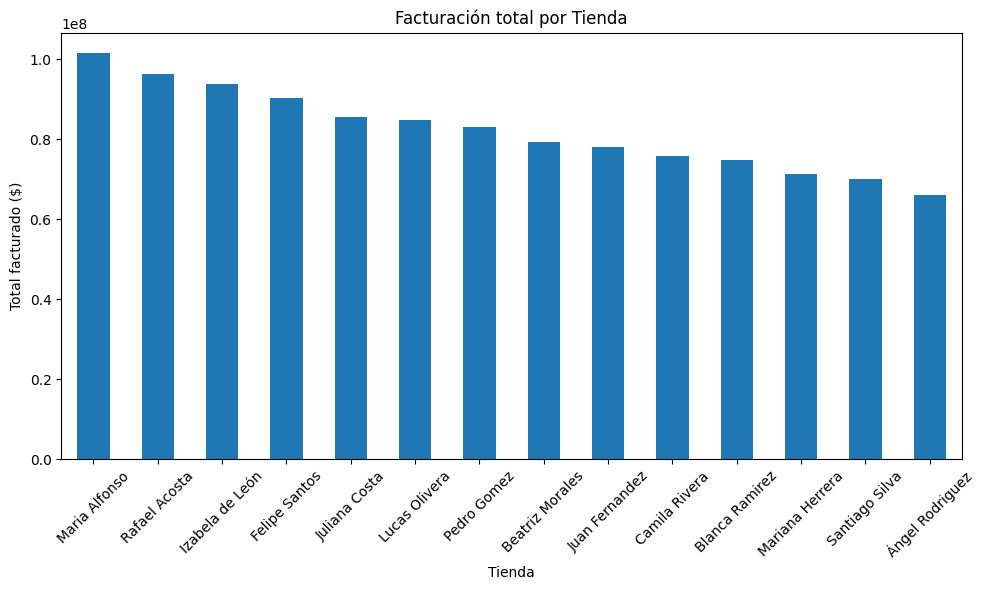

In [7]:
import matplotlib.pyplot as plt

facturacion_por_tienda.plot(kind='bar', figsize=(10, 6), title='Facturación total por Tienda', ylabel='Total facturado ($)', xlabel='Tienda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [9]:
# Agrupar por categoría y sumar las ventas
ventas_por_categoria = tienda.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

# Mostrar resultado
print(ventas_por_categoria)


Categoría del Producto
Electrónicos               429493500.0
Electrodomésticos          363685200.0
Muebles                    187633700.0
Instrumentos musicales      91299000.0
Deportes y diversión        39290000.0
Juguetes                    17995700.0
Artículos para el hogar     12698400.0
Libros                       8784900.0
Name: Precio, dtype: float64


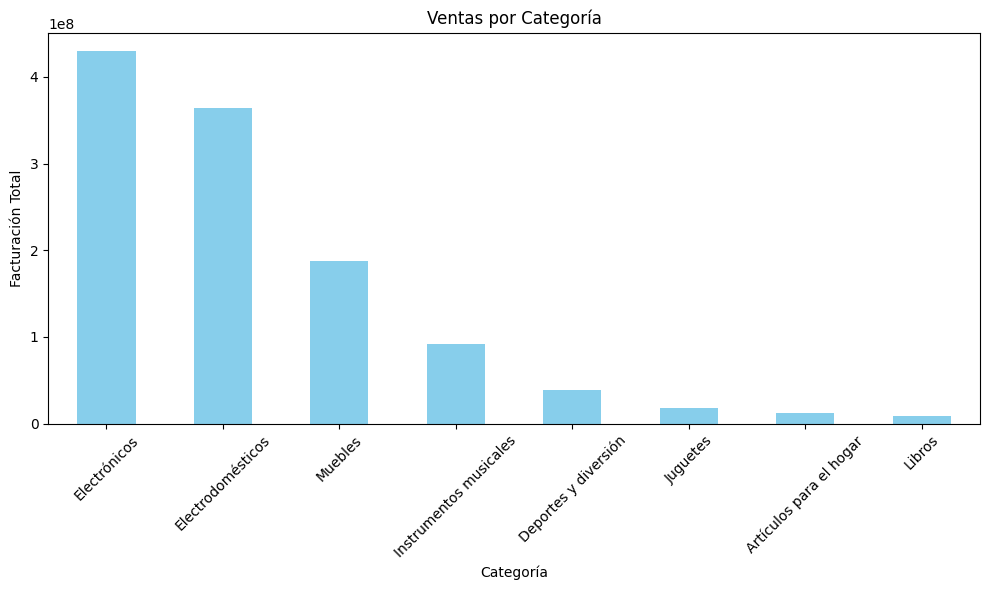

In [10]:
import matplotlib.pyplot as plt

# Crear gráfico de barras
ventas_por_categoria.plot(kind='bar', figsize=(10,6), color='skyblue')

# Títulos y etiquetas
plt.title('Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Facturación Total')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()


# 3. Calificación promedio de la tienda


In [12]:
# Lista de calificaciones
calificaciones = [4, 1, 1, 4, 5]

# Calcular el promedio
promedio = sum(calificaciones) / len(calificaciones)

print(f"El promedio de calificación de la tienda es: {promedio:.2f}")


El promedio de calificación de la tienda es: 3.00


# 4. Productos más y menos vendidos

In [13]:
# Datos de ventas por vendedor
ventas_vendedores = {
    "Maria Alfonso": 101528700.0,
    "Rafael Acosta": 96271300.0,
    "Izabela de León": 93776500.0,
    "Felipe Santos": 90206900.0,
    "Juliana Costa": 85678500.0,
    "Lucas Olivera": 84882800.0,
    "Pedro Gomez": 82973900.0,
    "Beatriz Morales": 79347300.0,
    "Juan Fernandez": 78040000.0,
    "Camila Rivera": 75847900.0,
    "Blanca Ramirez": 74766300.0,
    "Mariana Herrera": 71352200.0,
    "Santiago Silva": 70093900.0,
    "Ángel Rodriguez": 66114200.0
}

# Datos de ventas por categoría
ventas_categorias = {
    "Electrónicos": 429493500.0,
    "Electrodomésticos": 363685200.0,
    "Muebles": 187633700.0,
    "Instrumentos musicales": 91299000.0,
    "Deportes y diversión": 39290000.0,
    "Juguetes": 17995700.0,
    "Artículos para el hogar": 12698400.0,
    "Libros": 8784900.0
}

# Calcular el producto más vendido (con mayor venta total)
producto_mas_vendido = max(ventas_categorias, key=ventas_categorias.get)
cantidad_mas_vendida = ventas_categorias[producto_mas_vendido]

# Calcular el producto menos vendido (con menor venta total)
producto_menos_vendido = min(ventas_categorias, key=ventas_categorias.get)
cantidad_menos_vendida = ventas_categorias[producto_menos_vendido]

# Imprimir resultados
print(f"El producto más vendido es {producto_mas_vendido} con {cantidad_mas_vendida:.2f} unidades vendidas.")
print(f"El producto menos vendido es {producto_menos_vendido} con {cantidad_menos_vendida:.2f} unidades vendidas.")



El producto más vendido es Electrónicos con 429493500.00 unidades vendidas.
El producto menos vendido es Libros con 8784900.00 unidades vendidas.


# 5. Envío promedio por tienda

In [14]:
# Datos de costos de envío por tienda (valores proporcionados)
costos_envios = [6900.0, 8400.0, 15900.0, 41000.0, 20200.0]

# Calcular el costo promedio de envío simple
envio_promedio = sum(costos_envios) / len(costos_envios)

# Imprimir el resultado
print(f"El costo de envío promedio es: {envio_promedio:.2f}")


El costo de envío promedio es: 18480.00


## 📝 Análisis narrativo: ¿Qué tienda está dando menos lucro y qué debería vender?

Después de analizar los datos de ventas por categoría de producto, observamos que **la categoría de productos que menos ingresos genera** es:

> 📚 **Libros**, con una facturación de apenas **8.784.900 pesos**.

Esto representa un porcentaje muy pequeño en comparación con otras categorías como **Electrónicos** o **Electrodomésticos**, que superan los **300 millones de pesos**.

Este resultado puede deberse a varios factores:
- **Baja demanda**: los libros pueden no estar siendo solicitados por los clientes.
- **Competencia digital**: muchas personas consumen libros en formato electrónico.
- **Precio promedio bajo** por unidad en comparación con electrónicos o muebles.

### 📉 Conclusión:
La tienda especializada en la categoría de **libros** es actualmente la **menos rentable** de todas.

---

## 🛒 ¿Qué debería vender esta tienda para aumentar su rentabilidad?

Según los datos de ventas por categoría, la mejor estrategia sería **reconvertir su stock y su oferta hacia una categoría con mayor demanda y margen de ganancia**.

📊 Las tres categorías con mayor venta son:

1. **Electrónicos**: 429.493.500 pesos  
2. **Electrodomésticos**: 363.685.200 pesos  
3. **Muebles**: 187.633.700 pesos

### ✅ Recomendación:

> La tienda que actualmente vende libros debería considerar incorporar productos de la categoría **Electrónicos**, ya que es la más rentable en el mercado actual.

Esto podría incluir:
- Auriculares
- Smartphones
- Tablets
- Accesorios tecnológicos

Además, puede acompañarse con una campaña de marketing orientada a la tecnología, mejor diseño de tienda online y estrategias de envío competitivo (como se analizó en el punto anterior sobre costos de envío).

---

Con este enfoque, la tienda tendría **más oportunidades de captar clientes**, **aumentar sus ingresos**, y contribuir de forma más significativa al rendimiento total del negocio.
